<a href="https://colab.research.google.com/github/francotestori/aauba_02/blob/anto/AA_TP2_Anto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Encoders & Split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import PredefinedSplit
# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# Scoring & Reporting
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
print('Libraries Imported')

Libraries Imported


In [6]:
!wget https://raw.githubusercontent.com/francotestori/aauba_02/d9ac9be49832eaaee67f3dff431a519af4edd23d/resources/audio_digits_with_filename.csv
!wget https://raw.githubusercontent.com/francotestori/aauba_02/anto/testing.csv
!wget https://raw.githubusercontent.com/francotestori/aauba_02/anto/validation.csv

--2020-07-09 14:34:52--  https://raw.githubusercontent.com/francotestori/aauba_02/d9ac9be49832eaaee67f3dff431a519af4edd23d/resources/audio_digits_with_filename.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36670903 (35M) [text/plain]
Saving to: ‘audio_digits_with_filename.csv.2’

audio_digits_with_f 100%[===================>]  34.97M  43.4MB/s    in 0.8s    

2020-07-09 14:34:53 (43.4 MB/s) - ‘audio_digits_with_filename.csv.2’ saved [36670903/36670903]

--2020-07-09 14:34:55--  https://raw.githubusercontent.com/francotestori/aauba_02/anto/testing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... c

In [7]:
# Carga de archivos

df = pd.read_csv('audio_digits_with_filename.csv')
testing_list = pd.read_csv('testing.csv')
validation_list = pd.read_csv('validation.csv')

In [ ]:
df.columns

In [9]:
# Eliminamos columna 
df = df.drop(['Unnamed: 0'],axis=1)

# Creamos una columna que arregla el nombre del audio
df['audio_name'] = df['filename'].str.slice(start=15)

df

,mfcc_0_mean,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,mfcc_8_mean,mfcc_9_mean,mfcc_10_mean,mfcc_11_mean,energy_mean,mfcc_0_std,mfcc_1_std,mfcc_2_std,mfcc_3_std,mfcc_4_std,mfcc_5_std,mfcc_6_std,mfcc_7_std,mfcc_8_std,mfcc_9_std,mfcc_10_std,mfcc_11_std,energy_std,dmfcc_0_mean,dmfcc_1_mean,dmfcc_2_mean,dmfcc_3_mean,dmfcc_4_mean,dmfcc_5_mean,dmfcc_6_mean,dmfcc_7_mean,dmfcc_8_mean,dmfcc_9_mean,dmfcc_10_mean,dmfcc_11_mean,denergy_mean,dmfcc_0_std,...,dmfcc_2_std,dmfcc_3_std,dmfcc_4_std,dmfcc_5_std,dmfcc_6_std,dmfcc_7_std,dmfcc_8_std,dmfcc_9_std,dmfcc_10_std,dmfcc_11_std,denergy_std,ddmfcc_0_mean,ddmfcc_1_mean,ddmfcc_2_mean,ddmfcc_3_mean,ddmfcc_4_mean,ddmfcc_5_mean,ddmfcc_6_mean,ddmfcc_7_mean,ddmfcc_8_mean,ddmfcc_9_mean,ddmfcc_10_mean,ddmfcc_11_mean,ddenergy_mean,ddmfcc_0_std,ddmfcc_1_std,ddmfcc_2_std,ddmfcc_3_std,ddmfcc_4_std,ddmfcc_5_std,ddmfcc_6_std,ddmfcc_7_std,ddmfcc_8_std,ddmfcc_9_std,ddmfcc_10_std,ddmfcc_11_std,ddenergy_std,digit,filename,audio_name
0,-382.654773,81.992062,-10.466034,16.703624,15.064858,1.469531,0.738650,10.561022,3.785683,8.939926,-0.332847,8.097514,0.028764,137.510590,34.968016,42.769702,22.045729,14.322146,16.897516,15.894829,9.111238,12.406468,7.820727,9.972097,7.531197,0.033092,0.465623,0.118935,-0.240181,-0.132235,-0.174476,0.074379,0.127202,0.215166,0.258370,-0.218144,-0.242282,-0.069273,0.000115,44.616332,...,18.143336,14.801293,10.206257,8.053356,8.196087,7.246576,9.220593,6.395601,7.971393,6.188015,0.009718,-1.559687,0.307213,-0.163808,0.194978,0.833546,-0.511243,0.113721,-0.370007,0.111177,-0.029293,0.236959,0.144414,-5.079280e-05,34.907374,25.129074,15.457463,16.481991,11.989302,9.862465,8.461734,8.039956,10.557594,9.504841,11.035193,7.787053,0.007981,zero,speechcommands/zero/11860c84_nohash_2.wav,zero/11860c84_nohash_2.wav
1,-528.428641,127.828079,33.843659,22.871960,-34.069043,-28.401585,-3.375823,-5.302946,-5.785791,-16.762124,-18.340883,0.528990,0.012691,136.474466,92.136851,36.177811,58.035257,26.124762,19.352427,10.756481,19.926272,12.245608,13.907403,8.269393,11.465786,0.011142,4.655043,3.276616,-0.988087,-1.779134,-1.637207,-1.346900,0.154238,1.215813,0.203003,-0.683043,-0.134754,0.506908,0.000047,37.856854,...,19.929859,22.445112,11.323166,8.336180,7.117498,7.776480,5.970850,4.488614,5.255385,6.525702,0.002812,-0.235888,-0.623514,-0.660350,-0.178229,0.255610,0.271350,0.011395,0.151766,0.429971,0.331527,0.300412,0.500375,-2.872481e-07,28.129722,12.122865,14.951065,21.684503,10.992279,10.619062,7.726421,9.027867,6.840234,6.070130,6.030692,5.732078,0.001773,zero,speechcommands/zero/6c0f6493_nohash_2.wav,zero/6c0f6493_nohash_2.wav
2,-412.238074,85.164304,-7.764983,9.749988,17.824660,2.412232,0.489052,12.232704,1.109647,8.760713,2.017710,8.543726,0.021947,132.963284,36.925912,37.254952,25.050435,9.526212,17.685952,16.910935,6.335854,16.464523,10.294715,6.951481,5.494357,0.025866,-1.565333,1.106342,-0.324422,0.084857,0.382996,-0.374668,0.234524,-0.588129,-0.119107,0.333474,-0.133217,-0.123703,-0.000141,38.970147,...,19.599269,14.802910,5.640309,8.463017,6.955118,5.744769,9.847623,6.291521,5.739878,4.295406,0.007434,-0.813943,0.659865,0.108737,-0.326237,0.106723,0.272719,-0.067567,-0.041540,0.004496,-0.019274,0.053462,-0.252845,1.410721e-06,25.042045,27.756112,20.300162,15.541870,6.129140,9.556565,7.164912,7.305832,9.512310,7.561962,7.452398,5.491905,0.004347,zero,speechcommands/zero/11860c84_nohash_1.wav,zero/11860c84_nohash_1.wav
3,-395.972867,80.152628,30.964343,29.107898,10.741162,0.258521,-6.637028,2.816202,-8.467237,-12.118873,-8.953229,-2.478419,0.091139,146.172458,76.499123,42.154525,38.749233,14.210601,9.021388,19.225864,11.177995,9.721612,12.959875,8.625011,7.415202,0.112166,1.208552,1.446258,0.953675,0.664936,0.559688,0.361823,0.053236,-0.146416,-0.146514,-0.086245,-0.144527,-0.347519,0.000055,39.176387,...,25.077658,14.663001,11.117366,7.766702,11.816412,6.973703,6.094961,5.303095,5.920717,4.610207,0.029948,-0.592528,-0.711845,-0.400277,-0.091

In [10]:
# Nos fijamos para cada audio a qué conjunto pertenece

tipo_split = []
for i in df['audio_name'] :
  if i in testing_list['test'].tolist():
    tipo_split.append('test')
  elif i in validation_list['validation'].tolist():
    tipo_split.append('validation') 
  else:
    tipo_split.append('training')

df['split'] = tipo_split

df['split'].value_counts()

training      18620
test           2552
validation     2494
Name: split, dtype: int64

In [11]:
# Armado de conjuntos

df_test = df[df['split']=='test']
df_val = df[df['split']=='validation']
df_train = df[df['split']=='training']

# Target
y_train = df_train['digit']
y_val = df_val['digit']
y_test = df_test['digit']

# Features
x_train = df_train.drop(['digit','filename','audio_name','split'],axis=1)
x_val = df_val.drop(['digit','filename','audio_name','split'],axis=1)
x_test = df_test.drop(['digit','filename','audio_name','split'],axis=1)

In [38]:
# Versiones estandarizadas

# Feature Scaling
scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train))
x_val_scaled = pd.DataFrame(scaler.fit_transform(x_val))
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

# **Naive Bayes**

In [18]:
# Como no hay validación, se juntan train y val para entrenar al modelo.

x_train_nb = x_train.append(x_val, ignore_index=True)
y_train_nb = y_train.append(y_val, ignore_index=True)

In [40]:
# Versión estandarizada

x_train_nb_scaled = x_train_scaled.append(x_val_scaled, ignore_index=True)

**1) Sin escalar**

In [19]:
gnb = GaussianNB()
gnb.fit(x_train_nb, y_train_nb)
gnb_y_pred = gnb.predict(x_test)

In [ ]:
print(gnb.classes_)
print(gnb.get_params())

# Mean of each feature per class
print(gnb.theta_)

In [ ]:
# Confusion Matrix
plot_confusion_matrix(gnb, x_test, y_test)

In [21]:
# Classification Report
gnb_report = classification_report(y_test,gnb_y_pred)
print(gnb_report)

              precision    recall  f1-score   support

       eight       0.62      0.61      0.61       257
        five       0.57      0.59      0.58       271
        four       0.71      0.57      0.63       253
        nine       0.59      0.45      0.51       259
         one       0.41      0.49      0.45       248
       seven       0.56      0.46      0.51       239
         six       0.48      0.65      0.55       244
       three       0.54      0.48      0.51       267
         two       0.41      0.50      0.45       264
        zero       0.55      0.50      0.52       250

    accuracy                           0.53      2552
   macro avg       0.54      0.53      0.53      2552
weighted avg       0.54      0.53      0.53      2552



**2) Escalado**

In [44]:
gnb_scaled = GaussianNB()
gnb_scaled.fit(x_train_nb_scaled, y_train_nb)
gnb_y_pred_scaled = gnb_scaled.predict(x_test_scaled)

In [45]:
# Classification Report
gnb_report_scaled = classification_report(y_test,gnb_y_pred_scaled)
print(gnb_report_scaled)

              precision    recall  f1-score   support

       eight       0.63      0.62      0.63       257
        five       0.53      0.62      0.57       271
        four       0.66      0.57      0.61       253
        nine       0.60      0.48      0.54       259
         one       0.44      0.47      0.45       248
       seven       0.54      0.49      0.52       239
         six       0.48      0.66      0.56       244
       three       0.60      0.45      0.51       267
         two       0.41      0.50      0.45       264
        zero       0.57      0.50      0.53       250

    accuracy                           0.54      2552
   macro avg       0.55      0.54      0.54      2552
weighted avg       0.55      0.54      0.54      2552



# **`RandomForestClassifier`**

In [47]:
rf = RandomForestClassifier(
    random_state=4589
)
rf.fit(x_train_scaled, y_train)
print("Accuracy training : {:.3f}".format(rf.score(x_train_scaled, y_train)))
print("Accuracy test: {:.3f}".format(rf.score(x_val_scaled, y_val)))

Accuracy training : 1.000
Accuracy test: 0.685


In [64]:
x_train_2 = x_train
x_train_2['fold'] = -1

x_val_2 = x_val
x_val_2['fold'] = 0

x_train_y_val = x_train_2.append(x_val_2, ignore_index=True)

split_index = x_train_y_val['fold']

x_train_y_val = x_train_y_val.drop(['fold'],axis=1)

In [67]:
y_train_y_val = y_train.append(y_val, ignore_index=True)

In [66]:
ps = PredefinedSplit(split_index)

In [ ]:
parameters = {
    'n_estimators':range(50, 200, 10), 
    'max_depth':range(1,6),
    'criterion': ['gini','entropy']
}

clf = RandomizedSearchCV(
    RandomForestClassifier(), 
    n_iter=15,
    param_distributions= parameters,  
    scoring='accuracy',
    cv=ps,
    refit = False
)

clf.fit(x_train_y_val, y_train_y_val)


In [73]:
print (clf.best_score_, clf.best_params_)


0.570168404170008 {'n_estimators': 170, 'max_depth': 5, 'criterion': 'entropy'}


In [76]:
x_train = x_train.drop(['fold'],axis=1)

In [79]:
best_rfc = RandomForestClassifier(
  random_state=4589,
  bootstrap = True,
  max_depth = 5,
  n_estimators = 170,
  criterion = 'entropy'
)

best_rfc.fit(x_train,y_train)
y_pred_test = best_rfc.predict(x_test)

print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

       eight       0.55      0.86      0.67       257
        five       0.62      0.39      0.48       271
        four       0.60      0.69      0.64       253
        nine       0.53      0.54      0.54       259
         one       0.46      0.43      0.45       248
       seven       0.53      0.60      0.56       239
         six       0.55      0.70      0.62       244
       three       0.58      0.39      0.46       267
         two       0.63      0.34      0.45       264
        zero       0.49      0.58      0.53       250

    accuracy                           0.55      2552
   macro avg       0.55      0.55      0.54      2552
weighted avg       0.56      0.55      0.54      2552



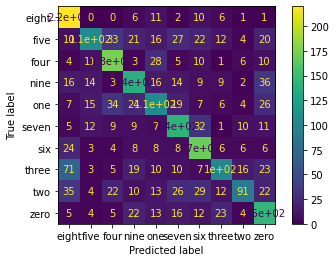

In [82]:
# Matriz de confusión
plot_confusion_matrix(best_rfc, x_test, y_test)

# **Gradient Boosting**

In [ ]:
gb = GradientBoostingClassifier(
    random_state=4589
)
gb.fit(x_train, y_train)


In [86]:
print("Accuracy on training set: {:.3f}".format(gb.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gb.score(x_test, y_test)))

Accuracy on training set: 0.836
Accuracy on test set: 0.702


In [92]:
parameters = {
    'n_estimators':range(50, 200, 10),  
    'max_depth':range(1,6), 
    'learning_rate': np.linspace(0 ,0.1, 10),
    'max_features': ['sqrt','log2']
}

clf = RandomizedSearchCV(
    GradientBoostingClassifier(), 
    param_distributions= parameters,  
    scoring='accuracy',
    cv=ps,
    n_iter= 5,
    n_jobs=10,
    refit = False
)

clf.fit(x_train_y_val, y_train_y_val)

print (clf.best_score_, clf.best_params_)

0.7229350441058541 {'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.06666666666666667}


In [93]:
print (clf.best_score_, clf.best_params_)

0.7229350441058541 {'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.06666666666666667}


In [96]:
best_gbm = GradientBoostingClassifier(n_estimators = 150,max_features='sqrt',max_depth=4,learning_rate=0.067)


best_gbm.fit(x_train,y_train)
y_pred_test = best_gbm.predict(x_test)

print(best_gbm.score(x_test,y_test))
print(classification_report(y_test,y_pred_test))

0.7108150470219435
              precision    recall  f1-score   support

       eight       0.72      0.80      0.76       257
        five       0.74      0.74      0.74       271
        four       0.80      0.70      0.75       253
        nine       0.67      0.75      0.71       259
         one       0.69      0.62      0.65       248
       seven       0.67      0.74      0.70       239
         six       0.83      0.75      0.79       244
       three       0.62      0.66      0.64       267
         two       0.66      0.62      0.64       264
        zero       0.75      0.72      0.73       250

    accuracy                           0.71      2552
   macro avg       0.71      0.71      0.71      2552
weighted avg       0.71      0.71      0.71      2552



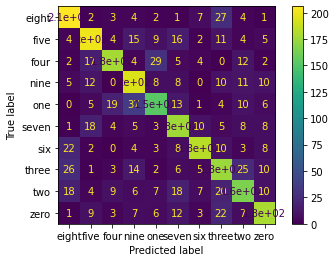

In [97]:
# Matriz de confusión
plot_confusion_matrix(best_gbm, x_test, y_test)